In [25]:
import scanpy as sc
import harmonypy as hm
import pandas as pd
import anndata as ad
import numpy as np
import scrublet as scr
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import io
from scipy import sparse

import warnings
warnings.filterwarnings('ignore')

random_State = 7

In [4]:
adata = sc.read("/data/BCI-SingleCell/SCC_Atlas/Sam_Nicholls/adata_ker_tum.h5ad")

In [26]:
adata2 = sc.read("/data/BCI-SingleCell/SCC_Atlas/Sam_Nicholls/Combined_adata_object_V4.h5ad")

In [33]:
adata2

AnnData object with n_obs × n_vars = 309801 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'Condition', 'Patient_ID', 'level1_celltype', 'level2_celltype', 'level3_celltype', 'treatment', 'cluster', 'UMAP1', 'UMAP2', 'Dataset', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'doublet_scores', 'predicted_doublets', 'clusters_r06', 'clusters_r08', 'clusters_r1', 'original_barcodes', 'celltypist_labels_abrv', 'celltypist_labels'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'Condition_colors', 'Patient_ID_colors', 'celltypist_labels_colors', 'clusters_r06', 'clusters_r06_colors', 'clusters_r08'

In [5]:
adata = adata[adata.obs.pct_counts_mt < 10, :].copy()
print("Number of cells after mt filter: {:d}".format(adata.n_obs))

Number of cells after mt filter: 42533


In [6]:
delcols = ['level1_celltype', 'level2_celltype', 'level3_celltype', 'treatment', 
           'clusters_r06','clusters_r1', 'cluster', 'UMAP1', 'UMAP2', ]
for i in delcols:
    del adata.obs[i]
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,batch,Condition,Patient_ID,Dataset,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,...,pct_counts_ribo,n_genes,doublet_scores,predicted_doublets,clusters_r08,original_barcodes,celltypist_labels_abrv,celltypist_labels,level_1_cell_type,adata_ker_tum_01
AAACCCAGTCATATGC,tetwt4,19143.0,4004.0,GSM6735859,Tumor,P14,Lyko,4004,8.295299,19143.0,...,19.819255,4004,0.045124,False,2,AAACCCAGTCATATGC,Differentiated_KC,Differentiated Keratinocyte,Suprabasal/Differentiating Keratinocytes,0
AAACCCATCGGCTGTG,tetwt4,1149.0,469.0,GSM6735859,Tumor,P14,Lyko,469,6.152733,1149.0,...,15.578764,469,0.037753,False,4,AAACCCATCGGCTGTG,Differentiated_KC,Differentiated Keratinocyte,Suprabasal/Differentiating Keratinocytes,2
AAACGAACAACAGCCC,tetwt4,6563.0,2633.0,GSM6735859,Tumor,P14,Lyko,2633,7.876259,6563.0,...,5.911931,2633,0.047782,False,0,AAACGAACAACAGCCC,Undifferentiated_KC,Undifferentiated Keratinocyte,Basal Keratinocytes,0
AAACGAAGTGGAACAC,tetwt4,49435.0,6669.0,GSM6735859,Tumor,P14,Lyko,6669,8.805375,49435.0,...,15.838980,6669,0.146580,False,10,AAACGAAGTGGAACAC,Differentiated_KC,Differentiated Keratinocyte,Basal Keratinocytes,0
AAAGGATCACGTACTA,tetwt4,10800.0,3240.0,GSM6735859,Tumor,P14,Lyko,3240,8.083637,10800.0,...,19.851852,3240,0.072255,False,0,AAAGGATCACGTACTA,Differentiated_KC,Differentiated Keratinocyte,Basal Keratinocytes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCCACATTCTT-1,NaN,NaN,NaN,GSM5788502_S12_filtered_feature_bc_matrix,Tumor,P27,Zou,6268,8.743372,41934.0,...,11.468021,6268,0.034406,False,0,TTTCCTCCACATTCTT-1,Differentiated_KC,Differentiated Keratinocyte,Basal Keratinocytes,1
TTTCGATTCATATGGC-1,NaN,NaN,NaN,GSM5788502_S12_filtered_feature_bc_matrix,Tumor,P27,Zou,7325,8.899185,56328.0,...,8.993751,7325,0.051121,False,10,TTTCGATTCATATGGC-1,Undifferentiated_KC,Undifferentiated Keratinocyte,Basal Keratinocytes,3
TTTGACTTCGGCTGGT-1,NaN,NaN,NaN,GSM5788502_S12_filtered_feature_bc_matrix,Tumor,P27,Zou,6237,8.738415,61286.0,...,19.934406,6237,0.057826,False,10,TTTGACTTCGGCTGGT-1,Differentiated_KC,Differentiated Keratinocyte,Basal Keratinocytes,1
TTTGGAGAGCAGATAT-1,NaN,NaN,NaN,GSM5788502_S12_filtered_feature_bc_matrix,Tumor,P27,Zou,4210,8.345455,23162.0,...,31.098351,4210,0.028052,False,0,TTTGGAGAGCAGATAT-1,Undifferentiated_KC,Undifferentiated Keratinocyte,Basal Keratinocytes,1


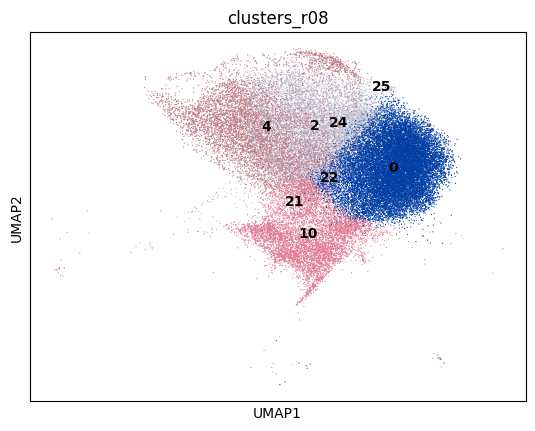

In [9]:
sc.pl.umap(adata, color='clusters_r08', legend_loc='on data')

### Getting DE ranked genes for cluster 21

In [17]:
sc.tl.rank_genes_groups(adata, groupby='clusters_r08', method='wilcoxon', pts = True, key_added = "Cluster_DE")

In [21]:
#Return only adjusted p-values below the cutoff.
deg = sc.get.rank_genes_groups_df(adata, group = None, key="Cluster_DE")
deg = deg.rename(columns={'group': 'clusters'})
deg['pct_diff'] = deg.pct_nz_group - deg.pct_nz_reference
deg = deg.groupby('clusters', as_index=False).apply(lambda x: x.sort_values('logfoldchanges', ascending=False))
deg = deg.groupby('clusters', as_index=False).apply(lambda x: x.sort_values('pct_diff', ascending=False))
deg = deg[deg['clusters'] == '21']
deg = deg.reset_index()
deg.to_csv('DE_files/top_genes_table_21vTumker.csv')
deg

,level_0,level_1,level_2,clusters,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference,pct_diff
0,3,3,184836,21,KRT19,28.194853,7.996095,6.761996e-175,5.207751e-171,0.856383,0.063406,0.792977
1,3,3,184837,21,KRT7,26.902231,8.523171,2.068125e-159,1.365228e-155,0.813830,0.038428,0.775402
2,3,3,184840,21,AQP5,22.638651,9.441875,1.804798e-113,4.169895e-110,0.680851,0.008255,0.672596
3,3,3,184846,21,PPP1R1B,19.263243,8.303103,1.093126e-82,6.734966e-80,0.582447,0.013046,0.569400
4,3,3,184847,21,S100A1,18.811213,8.153574,6.112334e-79,3.402950e-76,0.571809,0.019641,0.552168
...,...,...,...,...,...,...,...,...,...,...,...,...
46204,3,3,231039,21,KRT6A,-26.743191,-5.704758,1.481816e-157,8.559154e-154,0.140957,0.867970,-0.727012
46205,3,3,231040,21,HSPB1,-28.507339,-5.099731,9.500552e-179,8.780220e-175,0.226064,0.956306,-0.730242
46206,3,3,231038,21,PLP2,-25.472507,-4.622966,3.976539e-143,2.041688e-139,0.095745,0.826435,-0.730690
46207,3,3,231044,21,KRT5,-30.009195,-6.179954,7.444825e-198,3.440179e-193,0.196809,0.940034,-0.743225


### GSEAPY pathway analysis

In [ ]:
#Ranking genes based on the score, the ranking score calculation produces infinites which wont work
ranked_gene_list = degs['scores']
ranked_gene_list = ranked_gene_list.sort_values(ascending=False)

print(ranked_gene_list.head(10))
print(len(ranked_gene_list))

In [ ]:
#Testing whether the scores have a gaussian distribution 
sns.histplot(degs['scores'])
plt.ylim(0, 100)
plt.xlim(-50, 50)
plt.show()

In [20]:
gene_sets = ["GO_Biological_Process_2025",
             "KEGG_2021_Human",
             "Reactome_Pathways_2024",
             "MSigDB_Hallmark_2020",
            ]
from gseapy import dotplot

#Functions do generate dotplots of top pathways using all of the gene sets
def gsea_runner(gene_set, ranked_gene_list=ranked_gene_list):
    # 2. Run GSEA using prerank (equivalent to gseGO)
    gsea_res = gp.prerank(
        rnk=ranked_gene_list,  # Must be a pandas Series or 2-col DataFrame
        gene_sets=gene_set,  # or 'GO_Biological_Process_2021', etc.       
        permutation_num=10000,  # Can increase for better stats
        outdir="figures", # Save results
        seed=117,  # For reproducibility
        verbose=True,
        #min_size=5,
        #max_size=1000
    )

    gsea_res.res2d.to_csv(f"figures/GSEA_{gene_set}.csv")

    # to save your figure, make sure that ``ofname`` is not None
    ax = dotplot(gsea_res.res2d,
                 column="FDR q-val",
                 title=f"{gene_set}",
                 cmap=plt.cm.viridis,
                 size=6, # adjust dot size
                 figsize=(4,5), cutoff=0.2, show_ring=False,
                 ofname=f"figures/GSEA_{gene_set}.png")

## Preparing DE files for other Comparisons

In [23]:
#Cluster 8 vs Tumor Keratinocytes - Done
##
sc.tl.rank_genes_groups(adata, groupby='adata_ker_tum_01', 
                        method='wilcoxon', pts = True, key_added = "Cluster_DE1")

#Return only adjusted p-values below the cutoff.
deg1 = sc.get.rank_genes_groups_df(adata, group = None, key="Cluster_DE1")
deg1 = deg1.rename(columns={'group': 'clusters'})
deg1['pct_diff'] = deg1.pct_nz_group - deg1.pct_nz_reference
deg1 = deg1.groupby('clusters', as_index=False).apply(lambda x: x.sort_values('logfoldchanges', ascending=False))
deg1 = deg1.groupby('clusters', as_index=False).apply(lambda x: x.sort_values('pct_diff', ascending=False))
deg1 = deg1[deg1['clusters'] == '8']
deg1 = deg1.reset_index()
deg1.to_csv('DE_files/top_genes_table_PLKsVTumker.csv')
deg1

,level_0,level_1,level_2,clusters,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference,pct_diff
0,8,8,369672,8,KRT19,32.838425,8.250131,1.666517e-236,3.850405e-232,0.892704,0.061307,0.831397
1,8,8,369673,8,KRT7,31.279940,8.893359,8.746974e-215,6.736482e-211,0.847639,0.036394,0.811245
2,8,8,369676,8,AQP5,26.168180,10.285217,6.120916e-151,1.767759e-147,0.706009,0.006537,0.699471
3,8,8,369679,8,PPP1R1B,23.446695,8.874920,1.428588e-121,1.886104e-118,0.635193,0.011244,0.623949
4,8,8,369683,8,S100A1,21.700932,8.312580,2.010470e-104,1.548364e-101,0.592275,0.018233,0.574042
...,...,...,...,...,...,...,...,...,...,...,...,...
46204,8,8,415868,8,LGALS7B,-25.185059,-5.832893,5.839863e-140,1.499190e-136,0.038627,0.707776,-0.669149
46205,8,8,415879,8,KRT5,-32.802296,-5.858663,5.460826e-236,8.411310e-232,0.251073,0.941023,-0.689950
46206,8,8,415877,8,HSPB1,-32.147255,-5.149341,9.647488e-227,8.916015e-223,0.257511,0.957520,-0.700009
46207,8,8,415875,8,KRT6A,-29.450279,-5.613601,1.248602e-190,7.212080e-187,0.167382,0.869232,-0.701850


### 21 vs Tum ker and 8 vs Tum Ker are essentially the Same, 21 vs Tum Ker was used in the Report

In [ ]:
#Tumor vs Normal
##
sc.tl.rank_genes_groups(adata2, groupby='Condition', 
                        method='wilcoxon', pts = True, key_added = "Cluster_DE2")

#Return only adjusted p-values below the cutoff.
deg2 = sc.get.rank_genes_groups_df(adata, group = None, key="Cluster_DE2")
deg2['pct_diff'] = deg2.pct_nz_group - deg2.pct_nz_reference
deg2 = deg2.groupby('group', as_index=False).apply(lambda x: x.sort_values('logfoldchanges', ascending=False))
deg2 = deg2.groupby('group', as_index=False).apply(lambda x: x.sort_values('pct_diff', ascending=False))
deg2 = deg2[deg2['group'] == 'Tumor']
deg2 = deg2.reset_index()
deg2.to_csv('DE_files/top_genes_table_TumvNorm.csv')
deg2

In [ ]:
#21 Vs all other cells - Done
#Tumor vs Normal
##
sc.tl.rank_genes_groups(adata2, groupby='clusters_r08', 
                        method='wilcoxon', pts = True, key_added = "Cluster_DE3")

#Return only adjusted p-values below the cutoff.
deg3 = sc.get.rank_genes_groups_df(adata2, group = None, key="Cluster_DE3")
deg3 = deg3.rename(columns={'group': 'clusters'})
deg3['pct_diff'] = deg3.pct_nz_group - deg3.pct_nz_reference
deg3 = deg3.groupby('clusters', as_index=False).apply(lambda x: x.sort_values('logfoldchanges', ascending=False))
deg3 = deg3.groupby('clusters', as_index=False).apply(lambda x: x.sort_values('pct_diff', ascending=False))
deg3 = deg3[deg3['clusters'] == '21']
deg3 = deg3.reset_index()
deg3.to_csv('DE_files/top_genes_table_PLKs_vAll_cells.csv')
deg3

In [31]:
#Interferons (16) vs All other clusters
##
sc.tl.rank_genes_groups(adata2, groupby='clusters_r08', 
                        method='wilcoxon', pts = True, key_added = "Cluster_DE4")

#Return only adjusted p-values below the cutoff.
deg4 = sc.get.rank_genes_groups_df(adata2, group = None, key="Cluster_DE4")
deg4 = deg4.rename(columns={'group': 'clusters'})
deg4['pct_diff'] = deg4.pct_nz_group - deg4.pct_nz_reference
deg4 = deg4.groupby('clusters', as_index=False).apply(lambda x: x.sort_values('logfoldchanges', ascending=False))
deg4 = deg4.groupby('clusters', as_index=False).apply(lambda x: x.sort_values('pct_diff', ascending=False))
deg4 = deg4[deg4['clusters'] == '16']
deg4 = deg4.reset_index()
deg4.to_csv('DE_files/top_genes_table_Interferons_vTumker.csv')
deg4

,level_0,level_1,level_2,clusters,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference,pct_diff
0,8,8,739344,16,CXCL10,86.478287,8.026524,0.000000e+00,0.000000e+00,0.932231,0.053766,0.878466
1,8,8,739345,16,CXCL11,80.630516,7.460123,0.000000e+00,0.000000e+00,0.863802,0.024383,0.839419
2,8,8,739351,16,IFIT3,70.876854,5.019000,0.000000e+00,0.000000e+00,0.805620,0.095418,0.710202
3,8,8,739359,16,CXCL9,66.708191,5.673896,0.000000e+00,0.000000e+00,0.742479,0.045831,0.696648
4,8,8,739346,16,GBP1,78.249550,4.473263,0.000000e+00,0.000000e+00,0.908099,0.222214,0.685885
...,...,...,...,...,...,...,...,...,...,...,...,...
46204,8,8,785537,16,LAPTM5,-22.293736,-3.915181,4.250055e-110,2.172465e-108,0.068430,0.287408,-0.218979
46205,8,8,785538,16,PTPRC,-23.432665,-3.901275,1.986129e-121,1.148649e-119,0.067769,0.298746,-0.230977
46206,8,8,785539,16,SLC2A3,-24.248348,-3.959009,6.882951e-130,4.350947e-128,0.049256,0.295809,-0.246552
46207,8,8,785547,16,SRGN,-29.638441,-3.843040,4.779591e-193,5.577276e-191,0.139835,0.407004,-0.267169
